# Exploratory Data Analysis (What can we observe?):
https://www.kaggle.com/jamesmartini/neural-network-cc-fraud-detection-with-90-recall


In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [8]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [9]:
tf.test.is_built_with_cuda()

True

In [10]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [11]:
from __future__ import absolute_import, division, print_function, unicode_literals
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('XLA_GPU')))

Num GPUs Available:  1


In [12]:
print(tf.constant('Hello from TensorFlow ' + tf.__version__) )

tf.Tensor(b'Hello from TensorFlow 2.3.0', shape=(), dtype=string)


In [13]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [14]:
from tensorflow.python.client import device_lib
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]
print(get_available_devices()) 
# my output was => ['/device:CPU:0']
# good output must be => ['/device:CPU:0', '/device:GPU:0']

['/device:CPU:0', '/device:XLA_CPU:0', '/device:GPU:0', '/device:XLA_GPU:0']


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv('creditcard.csv')

In [39]:
df.head()

,Amount,Class,Time,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,149.62,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,2.69,0,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,378.66,0,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,123.50,0,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,69.99,0,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Amount  284807 non-null  float64
 1   Class   284807 non-null  int64  
 2   Time    284807 non-null  float64
 3   V1      284807 non-null  float64
 4   V2      284807 non-null  float64
 5   V3      284807 non-null  float64
 6   V4      284807 non-null  float64
 7   V5      284807 non-null  float64
 8   V6      284807 non-null  float64
 9   V7      284807 non-null  float64
 10  V8      284807 non-null  float64
 11  V9      284807 non-null  float64
 12  V10     284807 non-null  float64
 13  V11     284807 non-null  float64
 14  V12     284807 non-null  float64
 15  V13     284807 non-null  float64
 16  V14     284807 non-null  float64
 17  V15     284807 non-null  float64
 18  V16     284807 non-null  float64
 19  V17     284807 non-null  float64
 20  V18     284807 non-null  float64
 21  V19     28

In [41]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Number of Transactions Per Class')

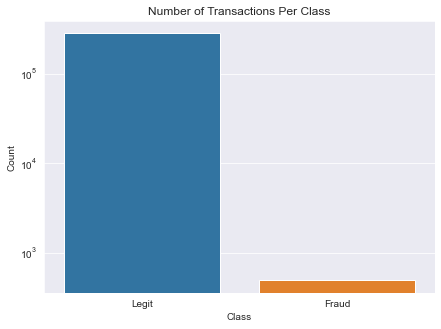

In [42]:
sns.set_style('darkgrid') #Set Seaborn plot style
fig, ax = plt.subplots(figsize=(7,5)) #Make the plot a little bigger.
ax.set_yscale('log') #Set the y-scale as logarithmic.
g = sns.countplot(x='Class', data=df, ax=ax) #Place the desired data on the plot.
g.set_xticklabels(['Legit','Fraud']) #Label the x-axis and y-axis correctly, and title the plot.
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Transactions Per Class')

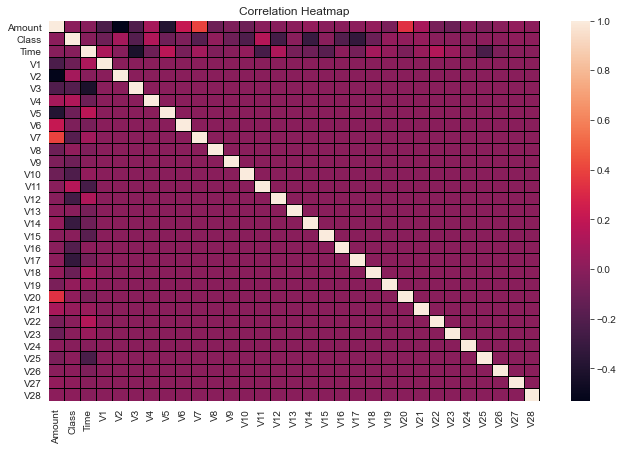

In [21]:
#list_of_correlations= df.corr(method='pearson')
#plt.figure(figsize=(11,7))
#sns.heatmap(list_of_correlations,linewidths=0.005,linecolor='k')
#plt.title('Correlation Heatmap')
#plt.show()

In [22]:
np.abs(list_of_correlations['Class']).sort_values(ascending=False).head(10)

Class    1.000000
V17      0.326481
V14      0.302544
V12      0.260593
V10      0.216883
V16      0.196539
V3       0.192961
V7       0.187257
V11      0.154876
V4       0.133447
Name: Class, dtype: float64

# Building a basic Neural Network Model:


In [43]:
from sklearn.model_selection import train_test_split
X = df.drop('Class',axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
X.head()

,Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,149.62,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,2.69,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,378.66,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,123.50,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,69.99,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [45]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [46]:
type(X_train)

pandas.core.frame.DataFrame

In [47]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [48]:
type(X_train)

numpy.ndarray

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [50]:
model = Sequential() #Initialise the model.

model.add(Dense(units=12,activation='relu')) #Add a single input layer.
model.add(Dense(units=1,activation='sigmoid')) #Add an output layer with sigmoid activation, as this is a binary classification.

model.compile(optimizer='rmsprop',loss='binary_crossentropy') #compile the model, choose how the cost function is optimised.

In [31]:
model.fit(X_train,y_train,                   #Pass in the training data
          epochs=10,                         #Specify how long we should train the model for (increasing this could lead to overfitting!)
          validation_data=(X_test,y_test))   #Specify validation data so that the model performance on the test set can be tracked, this is a good way to see if we get any overfitting!

Epoch 1/10
6231/6231 [==============================] - 14s 2ms/step - loss: 8.0907 - val_loss: 1.2060
Epoch 2/10
6231/6231 [==============================] - 14s 2ms/step - loss: 7.0452 - val_loss: 0.1854
Epoch 3/10
6231/6231 [==============================] - 16s 3ms/step - loss: 6.6982 - val_loss: 0.6719
Epoch 4/10
6231/6231 [==============================] - 17s 3ms/step - loss: 6.2368 - val_loss: 0.4117
Epoch 5/10
6231/6231 [==============================] - 16s 3ms/step - loss: 6.3028 - val_loss: 1.5672
Epoch 6/10
6231/6231 [==============================] - 17s 3ms/step - loss: 6.5510 - val_loss: 0.8592
Epoch 7/10
6231/6231 [==============================] - 17s 3ms/step - loss: 6.4388 - val_loss: 0.2892
Epoch 8/10
6231/6231 [==============================] - 17s 3ms/step - loss: 5.6219 - val_loss: 0.3806
Epoch 9/10
6231/6231 [==============================] - 16s 3ms/step - loss: 5.6068 - val_loss: 1.1195
Epoch 10/10
6231/6231 [==============================] - 17s 3ms/step - l

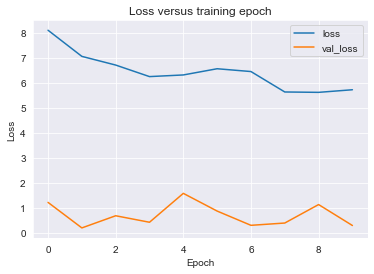

In [32]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss versus training epoch')
plt.show()

In [33]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.37      0.75      0.49       144

    accuracy                           1.00     85443
   macro avg       0.68      0.87      0.75     85443
weighted avg       1.00      1.00      1.00     85443



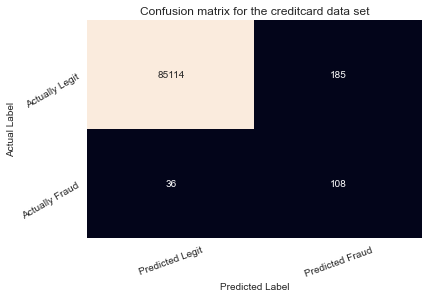

In [35]:
#Labels for the plot
classes = ['Legit','Fraud']
predicted_classes = ['Predicted ' + item for item in classes]
actual_classes = ['Actually ' + item for item in classes]

#Create a dataframe from confusion_matrix entries for easy plotting
conf_df = pd.DataFrame(data=confusion_matrix(y_test,predictions),columns=predicted_classes,
            index=actual_classes)

#Seaborn heatmap
sns.heatmap(conf_df,annot=True,fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.xticks(rotation=20)
plt.yticks(rotation=30)
plt.title('Confusion matrix for the creditcard data set')
plt.show()

# Performance Checkpoint 1: Scaling the data


In [51]:
X = df.drop(['Class'],axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [52]:
np.std(X_train,axis=0) #calculate the standard-deviation within each column


Amount      245.370386
Time      47490.518337
V1            1.959130
V2            1.651955
V3            1.515264
V4            1.417068
V5            1.370592
V6            1.327665
V7            1.224315
V8            1.206754
V9            1.097962
V10           1.088078
V11           1.021105
V12           1.001410
V13           0.994087
V14           0.959856
V15           0.914849
V16           0.875531
V17           0.850556
V18           0.838355
V19           0.814053
V20           0.765510
V21           0.740599
V22           0.726164
V23           0.616530
V24           0.605259
V25           0.521409
V26           0.482813
V27           0.398738
V28           0.333405
dtype: float64

In [53]:
np.mean(X_train,axis=0) #Calculate the mean within each column


Amount       88.200971
Time      94839.846667
V1            0.002987
V2            0.002746
V3           -0.001451
V4            0.000761
V5            0.000041
V6            0.001789
V7            0.000222
V8           -0.002651
V9            0.000580
V10           0.000738
V11           0.000440
V12          -0.000099
V13           0.000798
V14          -0.000039
V15          -0.001177
V16          -0.001813
V17          -0.000684
V18           0.002318
V19          -0.000299
V20          -0.000066
V21           0.000199
V22          -0.001446
V23           0.000879
V24           0.000802
V25          -0.000456
V26           0.000200
V27          -0.000140
V28          -0.000151
dtype: float64

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

#Convert to numpy arrays for tensorflow
y_train = y_train.values
y_test = y_test.values

In [56]:
X_train_scaled = scaler.fit_transform(X_train,y_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
np.std(X_train_scaled,axis=0) #Check that the column standard deviations are all 1


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [58]:
np.allclose(np.mean(X_train_scaled,axis=0), 0, rtol=1e-17) #Check that the column means are each very close to 0 (they are actually like 1e-18, so within machine to 0)

True

In [59]:
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy')

In [45]:
model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=10)


Epoch 1/10
6231/6231 [==============================] - 14s 2ms/step - loss: 0.0320 - val_loss: 0.0079
Epoch 2/10
6231/6231 [==============================] - 15s 2ms/step - loss: 0.0094 - val_loss: 0.0074
Epoch 3/10
6231/6231 [==============================] - 17s 3ms/step - loss: 0.0085 - val_loss: 0.0067
Epoch 4/10
6231/6231 [==============================] - 16s 3ms/step - loss: 0.0078 - val_loss: 0.0061
Epoch 5/10
6231/6231 [==============================] - 16s 3ms/step - loss: 0.0076 - val_loss: 0.0065
Epoch 6/10
6231/6231 [==============================] - 16s 3ms/step - loss: 0.0074 - val_loss: 0.0058
Epoch 7/10
6231/6231 [==============================] - 16s 3ms/step - loss: 0.0074 - val_loss: 0.0058
Epoch 8/10
6231/6231 [==============================] - 16s 3ms/step - loss: 0.0075 - val_loss: 0.0058
Epoch 9/10
6231/6231 [==============================] - 16s 3ms/step - loss: 0.0079 - val_loss: 0.0064
Epoch 10/10
6231/6231 [==============================] - 16s 3ms/step - l

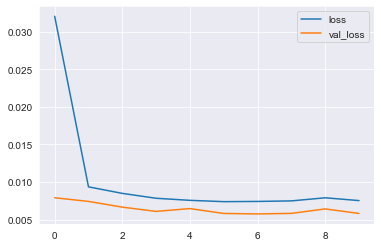

In [46]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.show()

In [87]:
predictions_scaled = (model.predict(X_test_scaled) > 0.5).astype("int32")
print(classification_report(y_test,predictions_scaled))

              precision    recall  f1-score   support

           0       1.00      0.13      0.23     85299
           1       0.00      1.00      0.00       144

    accuracy                           0.13     85443
   macro avg       0.50      0.56      0.12     85443
weighted avg       1.00      0.13      0.23     85443



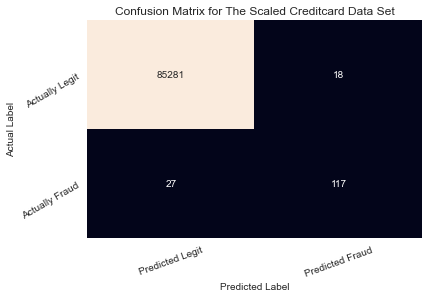

In [48]:
conf_df_scaled = pd.DataFrame(data=confusion_matrix(y_test,predictions_scaled),columns=predicted_classes,
            index=actual_classes)

sns.heatmap(conf_df_scaled,annot=True,fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.xticks(rotation=20)
plt.yticks(rotation=30)
plt.title('Confusion Matrix for The Scaled Creditcard Data Set')
plt.show()

# Performance Checkpoint 2: Upsampling and Downsampling the training data

In [49]:
from sklearn.utils import resample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#Create a dataframe which houses only the training data (so we can use pandas to manipulate it)
df_train = X_train
df_train['Class'] = y_train

df_majority = df_train[df_train['Class']==0] #Seperate the legitimate transactions
df_minority = df_train[df_train['Class']==1] #From the fraudulent transactions

#Downsample using sklearn
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=348,     
                                 random_state=101)

df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [50]:
df_downsampled['Class'].value_counts()

1    348
0    348
Name: Class, dtype: int64

In [51]:
X_train = df_downsampled.drop('Class',axis=1)
y_train = df_downsampled['Class']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train,y_train)
X_test = scaler.transform(X_test)

y_test = y_test.values
y_train = y_train.values

In [52]:
model = Sequential()
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy')

In [53]:
model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),verbose=1)


Epoch 1/30
22/22 [==============================] - 3s 132ms/step - loss: 0.6641 - val_loss: 0.5889
Epoch 2/30
22/22 [==============================] - 3s 124ms/step - loss: 0.5402 - val_loss: 0.4927
Epoch 3/30
22/22 [==============================] - 3s 123ms/step - loss: 0.4689 - val_loss: 0.4142
Epoch 4/30
22/22 [==============================] - 3s 125ms/step - loss: 0.4155 - val_loss: 0.3463
Epoch 5/30
22/22 [==============================] - 3s 127ms/step - loss: 0.3756 - val_loss: 0.2939
Epoch 6/30
22/22 [==============================] - 3s 125ms/step - loss: 0.3443 - val_loss: 0.2535
Epoch 7/30
22/22 [==============================] - 3s 126ms/step - loss: 0.3198 - val_loss: 0.2283
Epoch 8/30
22/22 [==============================] - 3s 129ms/step - loss: 0.3006 - val_loss: 0.2066
Epoch 9/30
22/22 [==============================] - 3s 134ms/step - loss: 0.2843 - val_loss: 0.1905
Epoch 10/30
22/22 [==============================] - 3s 142ms/step - loss: 0.2702 - val_loss: 0.1823

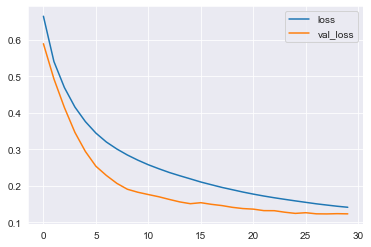

In [54]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.show()

In [55]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85299
           1       0.07      0.89      0.13       144

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443



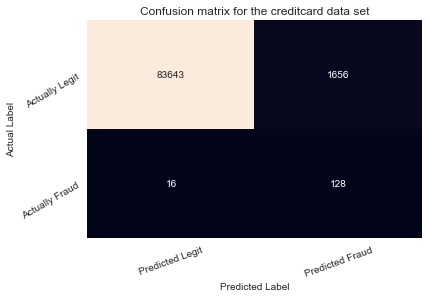

In [56]:
conf_df = pd.DataFrame(data=confusion_matrix(y_test,predictions),columns=predicted_classes,
            index=actual_classes)

sns.heatmap(conf_df,annot=True,fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.xticks(rotation=20)
plt.yticks(rotation=30)
plt.title('Confusion matrix for the creditcard data set')
plt.show()

In [58]:
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [59]:
#Number of Legit transactions, Number of Fraud transactions
sum(y_train == 0), sum(y_train==1)

(199016, 199016)

In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train,y_train)
X_test = scaler.transform(X_test)

y_train = y_train.values
y_test = y_test.values

In [61]:
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(units=12,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy')

In [62]:
model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),verbose=1)

Epoch 1/30
12439/12439 [==============================] - 26s 2ms/step - loss: 0.0875 - val_loss: 0.0415
Epoch 2/30
12439/12439 [==============================] - 29s 2ms/step - loss: 0.0552 - val_loss: 0.0313
Epoch 3/30
12439/12439 [==============================] - 30s 2ms/step - loss: 0.0499 - val_loss: 0.0305
Epoch 4/30
12439/12439 [==============================] - 29s 2ms/step - loss: 0.0495 - val_loss: 0.0295
Epoch 5/30
12439/12439 [==============================] - 29s 2ms/step - loss: 0.0479 - val_loss: 0.0338
Epoch 6/30
12439/12439 [==============================] - 32s 3ms/step - loss: 0.0469 - val_loss: 0.0310
Epoch 7/30
12439/12439 [==============================] - 31s 2ms/step - loss: 0.0487 - val_loss: 0.0350
Epoch 8/30
12439/12439 [==============================] - 32s 3ms/step - loss: 0.0482 - val_loss: 0.0345
Epoch 9/30
12439/12439 [==============================] - 32s 3ms/step - loss: 0.0479 - val_loss: 0.0314
Epoch 10/30
12439/12439 [==============================

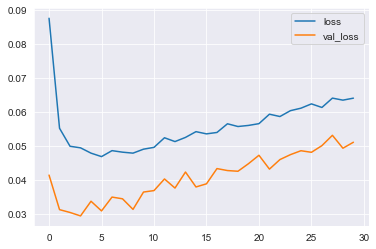

In [63]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.show()

In [64]:
predictions = model.predict_classes(X_test)

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.23      0.87      0.36       144

    accuracy                           0.99     85443
   macro avg       0.61      0.93      0.68     85443
weighted avg       1.00      0.99      1.00     85443



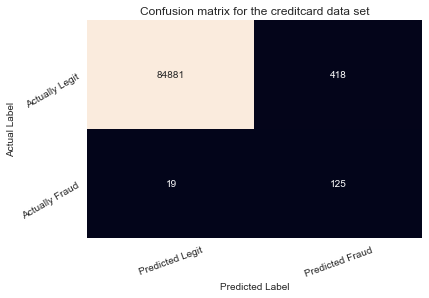

In [66]:
conf_df = pd.DataFrame(data=confusion_matrix(y_test,predictions),columns=predicted_classes,
            index=actual_classes)

sns.heatmap(conf_df,annot=True,fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.xticks(rotation=20)
plt.yticks(rotation=30)
plt.title('Confusion matrix for the creditcard data set')
plt.show()

# Performance Checkpoint 3: ROC curves and Precision-Recall curves

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train,y_train)
X_test = scaler.transform(X_test)

y_train = y_train.values
y_test = y_test.values

model = Sequential()
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy')
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),verbose=1)

Epoch 1/10
6231/6231 [==============================] - 18s 3ms/step - loss: 0.0213 - val_loss: 0.0074
Epoch 2/10
6231/6231 [==============================] - 19s 3ms/step - loss: 0.0091 - val_loss: 0.0072
Epoch 3/10
6231/6231 [==============================] - 19s 3ms/step - loss: 0.0086 - val_loss: 0.0066
Epoch 4/10
6231/6231 [==============================] - 19s 3ms/step - loss: 0.0074 - val_loss: 0.0065
Epoch 5/10
6231/6231 [==============================] - 19s 3ms/step - loss: 0.0075 - val_loss: 0.0066
Epoch 6/10
6231/6231 [==============================] - 17s 3ms/step - loss: 0.0074 - val_loss: 0.0061
Epoch 7/10
6231/6231 [==============================] - 17s 3ms/step - loss: 0.0072 - val_loss: 0.0061
Epoch 8/10
6231/6231 [==============================] - 17s 3ms/step - loss: 0.0077 - val_loss: 0.0060
Epoch 9/10
6231/6231 [==============================] - 17s 3ms/step - loss: 0.0069 - val_loss: 0.0057
Epoch 10/10
6231/6231 [==============================] - 16s 3ms/step - l

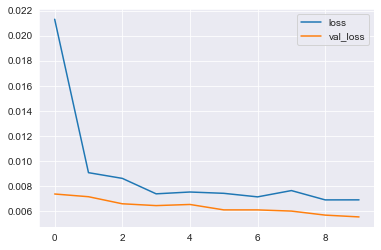

In [68]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.show()

In [69]:
probs = model.predict(X_test)
probs

array([[6.8971812e-10],
       [1.1596963e-09],
       [6.6742821e-08],
       ...,
       [2.2649404e-08],
       [2.8807998e-10],
       [1.3326087e-14]], dtype=float32)

In [70]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

Best Threshold=0.095552, F-Score=0.844


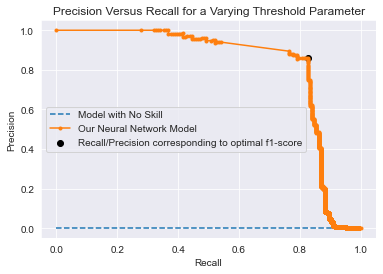

In [71]:
#Plot the Precision-Recall curve and no-skill curve
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='Model with No Skill')
plt.plot(recall, precision, marker='.', label='Our Neural Network Model')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Versus Recall for a Varying Threshold Parameter')

#Calculate the f1-score
fscore = (2 * precision * recall) / (precision + recall)

#Find the index of the largest f1-score and assign best threshold
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
best_thresh = thresholds[ix]

plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Recall/Precision corresponding to optimal f1-score')
plt.legend()
plt.show()

#Assign classes based on the best threshold
classes_on_thresh = np.array([int(p[0] > best_thresh) for p in probs])
predictions = classes_on_thresh

In [72]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.86      0.82      0.84       144

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443



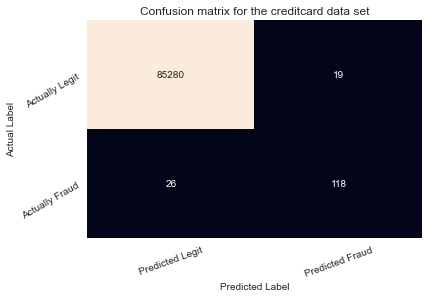

In [73]:
classes = ['Legit','Fraud']
predicted_classes = ['Predicted ' + item for item in classes]
actual_classes = ['Actually ' + item for item in classes]

conf_df = pd.DataFrame(data=confusion_matrix(y_test,predictions),columns=predicted_classes,
            index=actual_classes)

sns.heatmap(conf_df,annot=True,fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.xticks(rotation=20)
plt.yticks(rotation=30)
plt.title('Confusion matrix for the creditcard data set')
plt.show()

In [74]:
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train,y_train)
X_test = scaler.transform(X_test)

y_train = y_train.values
y_test = y_test.values

model = Sequential()
model.add(Dense(units=12,activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy')
model.fit(X_train,y_train,epochs=15, validation_data = (X_test,y_test),verbose=1)

Epoch 1/15
12439/12439 [==============================] - 29s 2ms/step - loss: 0.0795 - val_loss: 0.0428
Epoch 2/15
12439/12439 [==============================] - 28s 2ms/step - loss: 0.0482 - val_loss: 0.0291
Epoch 3/15
12439/12439 [==============================] - 30s 2ms/step - loss: 0.0415 - val_loss: 0.0374
Epoch 4/15
12439/12439 [==============================] - 31s 2ms/step - loss: 0.0398 - val_loss: 0.0366
Epoch 5/15
12439/12439 [==============================] - 29s 2ms/step - loss: 0.0378 - val_loss: 0.0284
Epoch 6/15
12439/12439 [==============================] - 30s 2ms/step - loss: 0.0360 - val_loss: 0.0317
Epoch 7/15
12439/12439 [==============================] - 30s 2ms/step - loss: 0.0348 - val_loss: 0.0302
Epoch 8/15
12439/12439 [==============================] - 31s 2ms/step - loss: 0.0357 - val_loss: 0.0316
Epoch 9/15
12439/12439 [==============================] - 33s 3ms/step - loss: 0.0355 - val_loss: 0.0297
Epoch 10/15
12439/12439 [==============================

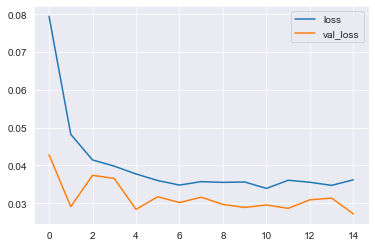

In [75]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.show()

In [76]:
probs = model.predict(X_test)
probs

array([[3.0648648e-10],
       [1.3163803e-10],
       [3.8574744e-17],
       ...,
       [1.2441472e-08],
       [2.5358071e-14],
       [2.2565605e-32]], dtype=float32)

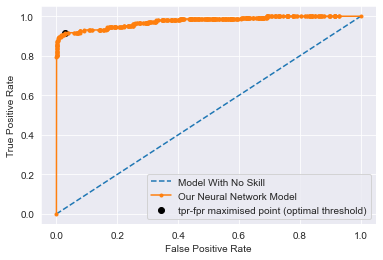

In [77]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, probs)

#Find the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]

#Plot the ROC curve
plt.plot([0,1], [0,1], linestyle='--', label='Model With No Skill')
plt.plot(fpr, tpr, marker='.', label='Our Neural Network Model')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='tpr-fpr maximised point (optimal threshold)')

#Label your axes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#Use the optimal threshold to generate predictions
classes_on_thresh = np.array([int(p[0] > best_thresh) for p in probs])
predictions = classes_on_thresh

In [78]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85299
           1       0.05      0.91      0.10       144

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.54     85443
weighted avg       1.00      0.97      0.98     85443



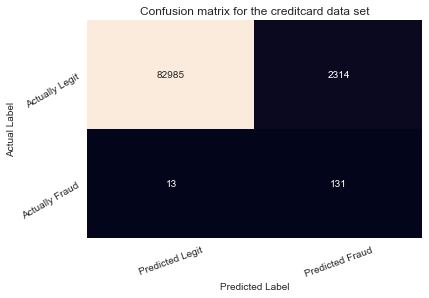

In [79]:
conf_df = pd.DataFrame(data=confusion_matrix(y_test,predictions),columns=predicted_classes,
            index=actual_classes)

sns.heatmap(conf_df,annot=True,fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.xticks(rotation=20)
plt.yticks(rotation=30)
plt.title('Confusion matrix for the creditcard data set')
plt.show()

In [80]:
from sklearn.utils import resample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

df_train = X_train
df_train['Class'] = y_train

df_majority = df_train[df_train['Class']==0] #Legit transactions
df_minority = df_train[df_train['Class']==1] #Fraudulent transations

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=348,     
                                 random_state=101)
 
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

X_train = df_downsampled.drop('Class',axis=1)
y_train = df_downsampled['Class']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train,y_train)
X_test = scaler.transform(X_test)

y_test = y_test.values
y_train = y_train.values

model = Sequential()
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy')

model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),verbose=1)

Epoch 1/30
22/22 [==============================] - 3s 149ms/step - loss: 0.6414 - val_loss: 0.6296
Epoch 2/30
22/22 [==============================] - 3s 144ms/step - loss: 0.5042 - val_loss: 0.4643
Epoch 3/30
22/22 [==============================] - 3s 148ms/step - loss: 0.4232 - val_loss: 0.3476
Epoch 4/30
22/22 [==============================] - 3s 151ms/step - loss: 0.3715 - val_loss: 0.2759
Epoch 5/30
22/22 [==============================] - 3s 147ms/step - loss: 0.3358 - val_loss: 0.2252
Epoch 6/30
22/22 [==============================] - 3s 149ms/step - loss: 0.3105 - val_loss: 0.2050
Epoch 7/30
22/22 [==============================] - 3s 153ms/step - loss: 0.2895 - val_loss: 0.1847
Epoch 8/30
22/22 [==============================] - 4s 161ms/step - loss: 0.2727 - val_loss: 0.1715
Epoch 9/30
22/22 [==============================] - 3s 158ms/step - loss: 0.2579 - val_loss: 0.1622
Epoch 10/30
22/22 [==============================] - 4s 166ms/step - loss: 0.2446 - val_loss: 0.1536

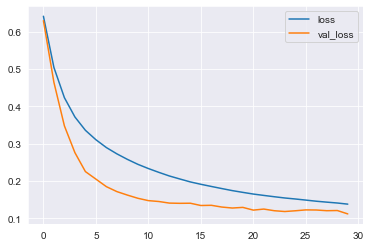

In [81]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.show()

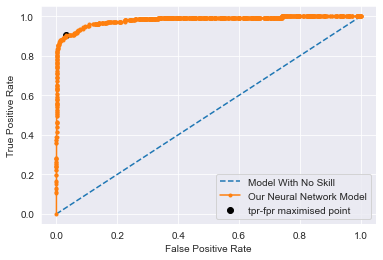

In [82]:
probs = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, probs)

#Find the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]

#Plot the ROC curve
plt.plot([0,1], [0,1], linestyle='--', label='Model With No Skill')
plt.plot(fpr, tpr, marker='.', label='Our Neural Network Model')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='tpr-fpr maximised point')

#Label your axes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#Use the optimal threshold to generate predictions
classes_on_thresh = np.array([int(p[0] > best_thresh) for p in probs])
predictions = classes_on_thresh

In [83]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85299
           1       0.05      0.90      0.09       144

    accuracy                           0.97     85443
   macro avg       0.52      0.93      0.54     85443
weighted avg       1.00      0.97      0.98     85443



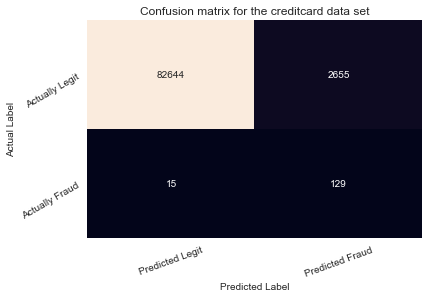

In [84]:
classes = ['Legit','Fraud']
predicted_classes = ['Predicted ' + item for item in classes]
actual_classes = ['Actually ' + item for item in classes]

conf_df = pd.DataFrame(data=confusion_matrix(y_test,predictions),columns=predicted_classes,
            index=actual_classes)

sns.heatmap(conf_df,annot=True,fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.xticks(rotation=20)
plt.yticks(rotation=30)
plt.title('Confusion matrix for the creditcard data set')
plt.show()

# From Omnidroid Code

In [14]:
%%time
model = Sequential()

model.add(Dense(units=15, activation='relu'))

#model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=False, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
#model.add(Dropout(0.2, noise_shape=None, seed=None))
#model.add(ActivityRegularization(l1=0.003, l2=0.01))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy') #compile the model, choose how the cost function is optimised.
print("done")

done
Wall time: 1.62 s


In [16]:
model.fit(X_train,y_train,                   #Pass in the training data
          epochs=10,                         #Specify how long we should train the model for (increasing this could lead to overfitting!)
          validation_data=(X_test,y_test))   #Specify validation data so that the model performance on the test set can be tracked, this is a good way to see if we get any overfitting!

Epoch 1/10
6231/6231 [==============================] - 15s 2ms/step - loss: 2.9631 - val_loss: 0.3646
Epoch 2/10
6231/6231 [==============================] - 15s 2ms/step - loss: 2.5550 - val_loss: 0.4761
Epoch 3/10
6231/6231 [==============================] - 16s 3ms/step - loss: 2.0017 - val_loss: 0.2253
Epoch 4/10
6231/6231 [==============================] - 17s 3ms/step - loss: 2.4100 - val_loss: 0.4408
Epoch 5/10
6231/6231 [==============================] - 17s 3ms/step - loss: 2.0480 - val_loss: 0.0764
Epoch 6/10
6231/6231 [==============================] - 17s 3ms/step - loss: 2.0650 - val_loss: 0.1931
Epoch 7/10
6231/6231 [==============================] - 16s 3ms/step - loss: 3.0442 - val_loss: 0.5432
Epoch 8/10
6231/6231 [==============================] - 16s 3ms/step - loss: 2.9299 - val_loss: 0.1651
Epoch 9/10
6231/6231 [==============================] - 17s 3ms/step - loss: 2.4696 - val_loss: 0.6917
Epoch 10/10
6231/6231 [==============================] - 17s 3ms/step - l

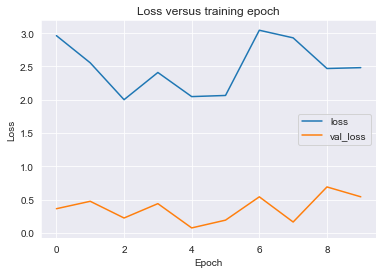

In [17]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss versus training epoch')
plt.show()

In [79]:


predictions = (model.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.00      0.00      0.00       144

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



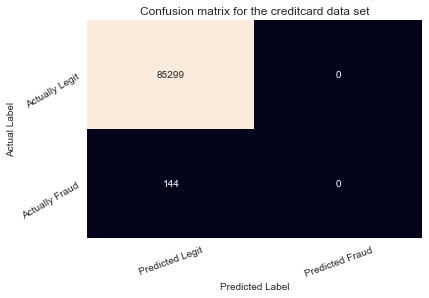

In [80]:
#Labels for the plot
classes = ['Legit','Fraud']
predicted_classes = ['Predicted ' + item for item in classes]
actual_classes = ['Actually ' + item for item in classes]

#Create a dataframe from confusion_matrix entries for easy plotting
conf_df = pd.DataFrame(data=confusion_matrix(y_test,predictions),columns=predicted_classes,
            index=actual_classes)

#Seaborn heatmap
sns.heatmap(conf_df,annot=True,fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.xticks(rotation=20)
plt.yticks(rotation=30)
plt.title('Confusion matrix for the creditcard data set')
plt.show()

# Scaled

In [60]:
model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=10)

Epoch 1/10
6231/6231 [==============================] - 15s 2ms/step - loss: 0.0248 - val_loss: 0.0076
Epoch 2/10
6231/6231 [==============================] - 15s 2ms/step - loss: 0.0091 - val_loss: 0.0076
Epoch 3/10
6231/6231 [==============================] - 16s 3ms/step - loss: 0.0082 - val_loss: 0.0064
Epoch 4/10
6231/6231 [==============================] - 17s 3ms/step - loss: 0.0077 - val_loss: 0.0064
Epoch 5/10
6231/6231 [==============================] - 18s 3ms/step - loss: 0.0078 - val_loss: 0.0065
Epoch 6/10
6231/6231 [==============================] - 17s 3ms/step - loss: 0.0074 - val_loss: 0.0063
Epoch 7/10
6231/6231 [==============================] - 17s 3ms/step - loss: 0.0073 - val_loss: 0.0059
Epoch 8/10
6231/6231 [==============================] - 17s 3ms/step - loss: 0.0069 - val_loss: 0.0064
Epoch 9/10
6231/6231 [==============================] - 17s 3ms/step - loss: 0.0075 - val_loss: 0.0054
Epoch 10/10
6231/6231 [==============================] - 17s 3ms/step - l

In [75]:
predictions_scaled = (model.predict(X_test_scaled) > 0.5).astype("int32")
print(classification_report(y_test,predictions_scaled))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.86      0.81      0.83       144

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443



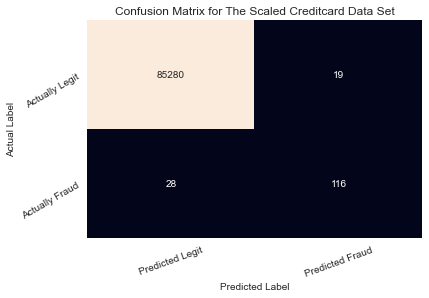

In [76]:
conf_df_scaled = pd.DataFrame(data=confusion_matrix(y_test,predictions_scaled),columns=predicted_classes,
            index=actual_classes)

sns.heatmap(conf_df_scaled,annot=True,fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.xticks(rotation=20)
plt.yticks(rotation=30)
plt.title('Confusion Matrix for The Scaled Creditcard Data Set')
plt.show()